# 📌 Extracão

---



In [5]:
import pandas as pd

df = pd.read_csv("TelecomX_Dados_Tratados.csv")

In [3]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [6]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


# 🔧 Preparação dos Dados

---





> **Remoção de Colunas Irrelevantes**



In [ ]:
df.columns

In [10]:
colunas_para_remover = ["customerID", "ID_Cliente", "ClientID"]

In [11]:
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns])

df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias'],
      dtype='object')



> **Encoding**



In [12]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print("Colunas categóricas encontradas:")
print(colunas_categoricas)

df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

print("\nFormato do dataset antes do One-Hot Encoding:", df.shape)
print("Formato do dataset após o One-Hot Encoding:", df_encoded.shape)

df_encoded.head()


Colunas categóricas encontradas:
Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

Formato do dataset antes do One-Hot Encoding: (7043, 21)
Formato do dataset após o One-Hot Encoding: (7043, 25)


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


> **Verificação da Proporção de Evasão**

In [13]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias'],
      dtype='object')

In [16]:
coluna_alvo = "Churn"

contagem = df[coluna_alvo].value_counts()

proporcao = df[coluna_alvo].value_counts(normalize=True)

In [18]:
contagem
proporcao

,proportion
Churn,
No,0.73463
Yes,0.26537


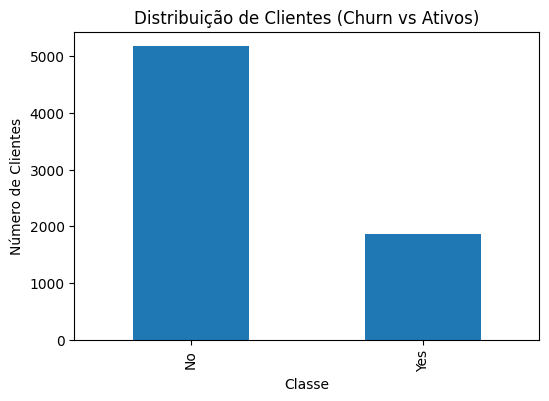

In [19]:
import matplotlib.pyplot as plt

contagem.plot(kind='bar', figsize=(6,4))
plt.title("Distribuição de Clientes (Churn vs Ativos)")
plt.xlabel("Classe")
plt.ylabel("Número de Clientes")
plt.show()

# 📊 Correlação e Seleção de Variáveis



> **Análise de Correlação**



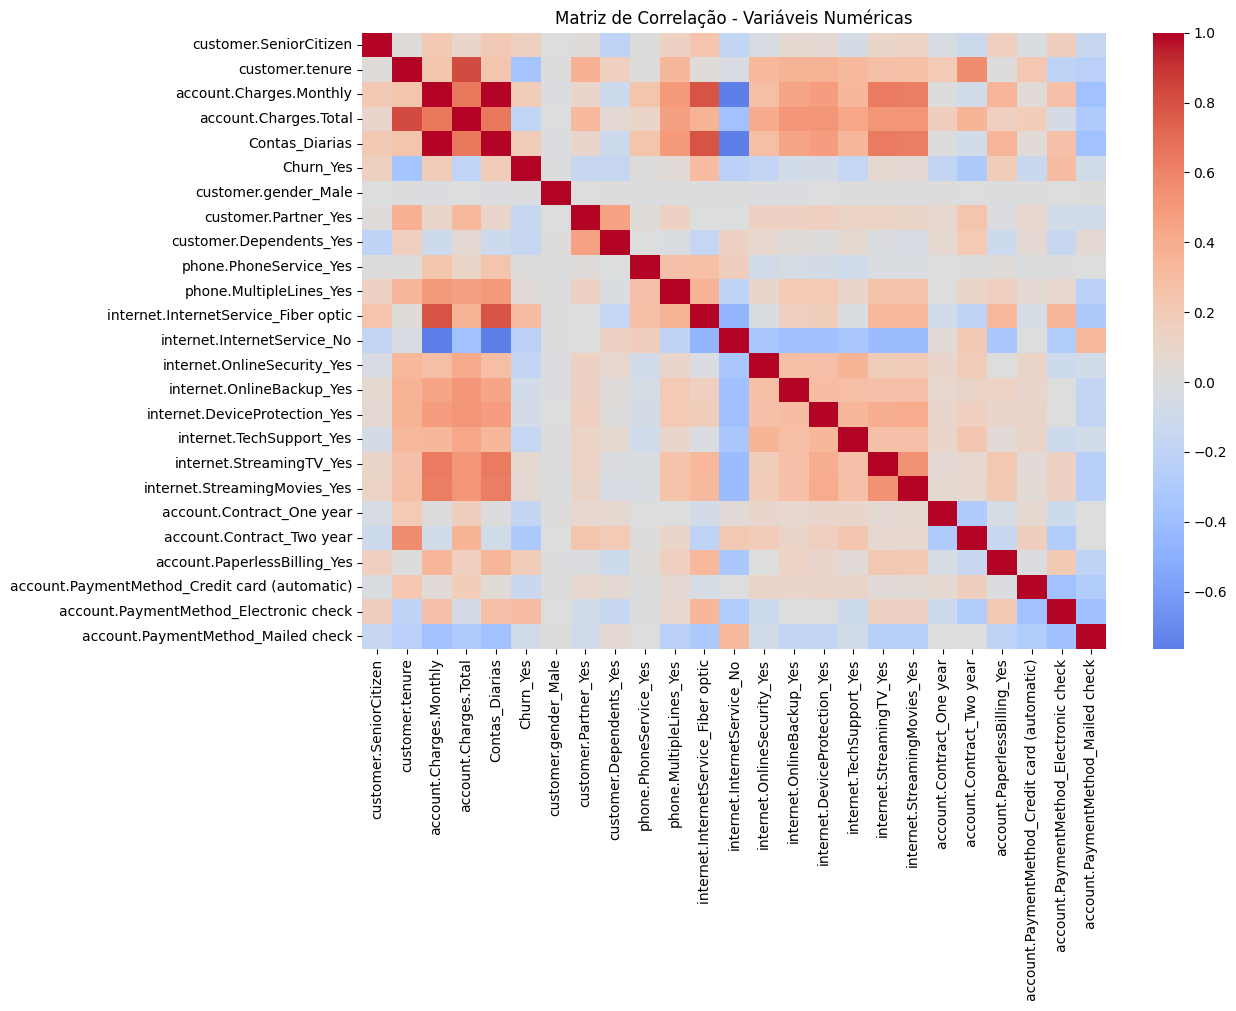

Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Contas_Diarias                                   0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                            -0.150448
customer.Depen

In [24]:
import seaborn as sns

coluna_alvo = "Churn_Yes"

corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

correlacao_com_alvo = corr[coluna_alvo].sort_values(ascending=False)
print(correlacao_com_alvo)



> **Análises Direcionadas**



/tmp/ipython-input-1912725246.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=coluna_alvo, y=coluna_tempo, data=df, palette="Set2")


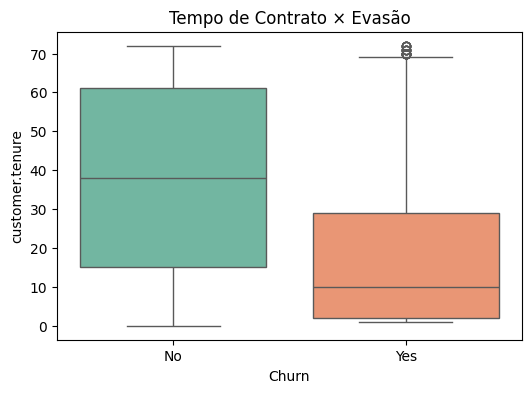

/tmp/ipython-input-1912725246.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=coluna_alvo, y=coluna_gasto, data=df, palette="Set2")


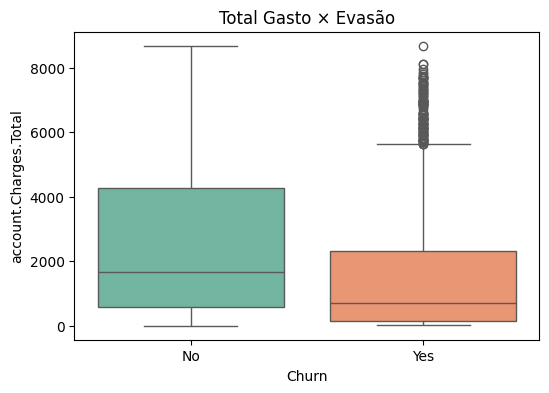

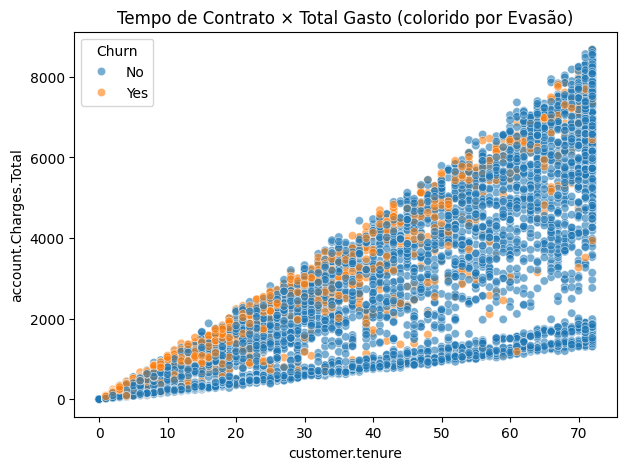

In [26]:
coluna_alvo = "Churn"
coluna_tempo = "customer.tenure"
coluna_gasto = "account.Charges.Total"

if df[coluna_alvo].dtype != 'object':
    df[coluna_alvo] = df[coluna_alvo].map({1: "Evadido", 0: "Ativo"})

plt.figure(figsize=(6,4))
sns.boxplot(x=coluna_alvo, y=coluna_tempo, data=df, palette="Set2")
plt.title("Tempo de Contrato × Evasão")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=coluna_alvo, y=coluna_gasto, data=df, palette="Set2")
plt.title("Total Gasto × Evasão")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=coluna_tempo, y=coluna_gasto, hue=coluna_alvo, data=df, alpha=0.6)
plt.title("Tempo de Contrato × Total Gasto (colorido por Evasão)")
plt.show()

# 🤖 Modelagem Preditiva



> **Separação de Dados**



In [30]:
from sklearn.model_selection import train_test_split

coluna_alvo = "Churn_Yes"

X = df_encoded.drop(columns=[coluna_alvo])
y = df_encoded[coluna_alvo]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (4930, 24)
Tamanho do conjunto de teste: (2113, 24)


> **Criação de Modelos**

===== Regressão Logística =====
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1552
        True       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

AUC: 0.8403440101438888


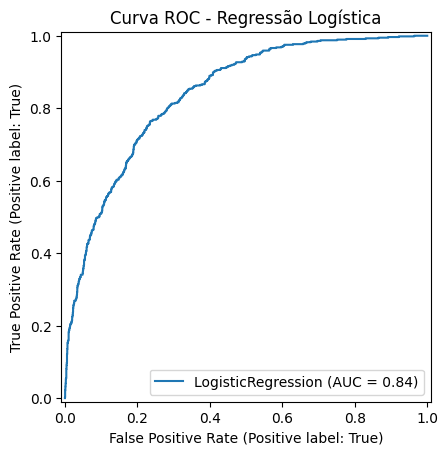

===== Random Forest =====
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1552
        True       0.62      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.71      2113
weighted avg       0.77      0.78      0.78      2113

AUC: 0.8253670727897532


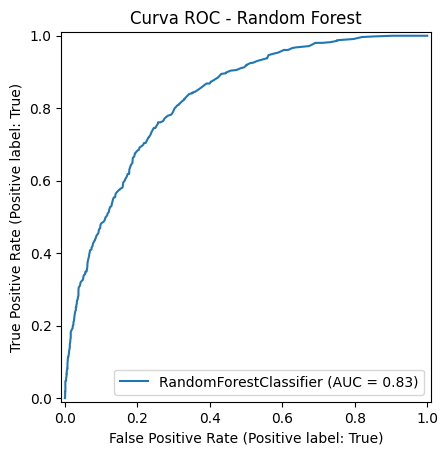

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

print("===== Regressão Logística =====")
print(classification_report(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_proba_log))

RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Curva ROC - Regressão Logística")
plt.show()

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()




> 🔹 Modelo 1 – Regressão Logística (com normalização)

Justificativa:
A regressão logística é um modelo linear bastante usado em problemas de classificação binária, como Churn.
Porém, ela é sensível à escala das variáveis, pois o cálculo dos coeficientes depende de distâncias e magnitudes.
→ Por isso, aplicaremos normalização (StandardScaler) antes do treino.





> 🔹 Modelo 2 – Random Forest (sem normalização)

Justificativa:
O Random Forest é um modelo baseado em árvores de decisão, que faz partições dos dados com base em divisões nos atributos.
Como os splits não dependem da escala das variáveis, não há necessidade de normalizar.
Além disso, o Random Forest costuma capturar bem relações não lineares e interações entre variáveis, sendo robusto para este tipo de problema.





> Avaliação dos Modelos

---





===== Regressão Logística =====
Acurácia: 0.7983909133932797
Precisão: 0.6415094339622641
Recall: 0.5454545454545454
F1-score: 0.5895953757225434
AUC: 0.8403440101438888

Relatório de classificação:
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1552
        True       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



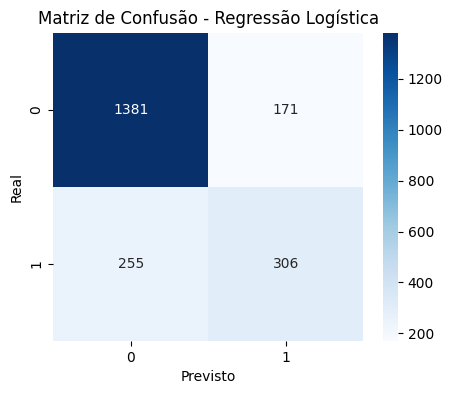

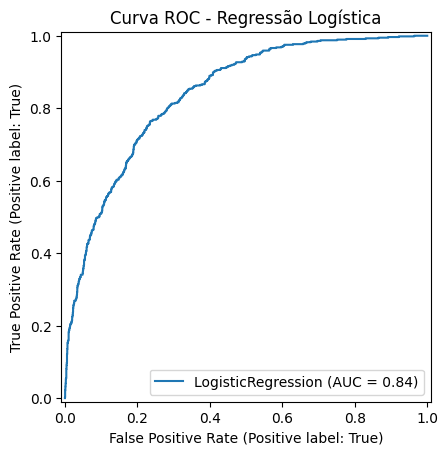

===== Random Forest =====
Acurácia: 0.7846663511594889
Precisão: 0.6167400881057269
Recall: 0.49910873440285203
F1-score: 0.5517241379310345
AUC: 0.8253670727897532

Relatório de classificação:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1552
        True       0.62      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.71      2113
weighted avg       0.77      0.78      0.78      2113



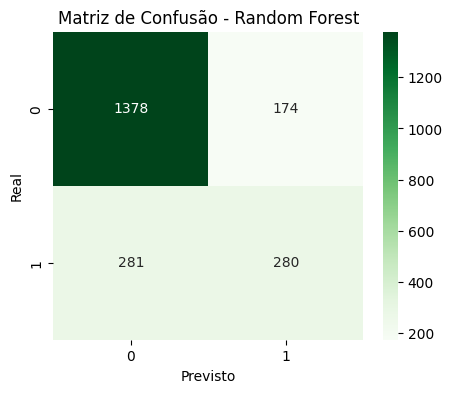

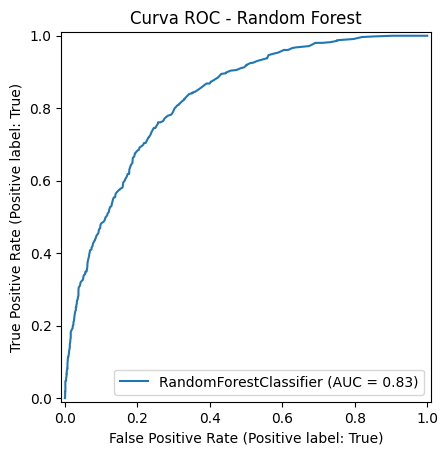


ANÁLISE CRÍTICA:

- A Regressão Logística é um modelo mais simples, interpretável e depende de normalização. 
  Se apresentar baixa recall, pode indicar underfitting (não capturou bem a evasão).

- O Random Forest, por ser mais complexo, tende a ter melhor desempenho em recall e F1-score.
  Porém, se a diferença entre treino e teste for muito grande, pode indicar overfitting.

- Overfitting: ajustado demais aos dados de treino. Solução → reduzir número de árvores, limitar profundidade, usar regularização.
- Underfitting: modelo muito simples. Solução → aumentar complexidade, mais variáveis, ajustar parâmetros.

A comparação final deve levar em conta: 
• Se o objetivo é prever com mais precisão quem vai sair (Recall alto), Random Forest pode ser melhor.
• Se o objetivo é ter um modelo mais simples e interpretável, a Regressão Logística pode ser suficiente.



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import seaborn as sns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

print("===== Regressão Logística =====")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Precisão:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_proba_log))

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Curva ROC - Regressão Logística")
plt.show()

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("===== Random Forest =====")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

print("""
ANÁLISE CRÍTICA:

- A Regressão Logística é um modelo mais simples, interpretável e depende de normalização.
  Se apresentar baixa recall, pode indicar underfitting (não capturou bem a evasão).

- O Random Forest, por ser mais complexo, tende a ter melhor desempenho em recall e F1-score.
  Porém, se a diferença entre treino e teste for muito grande, pode indicar overfitting.

- Overfitting: ajustado demais aos dados de treino. Solução → reduzir número de árvores, limitar profundidade, usar regularização.
- Underfitting: modelo muito simples. Solução → aumentar complexidade, mais variáveis, ajustar parâmetros.

A comparação final deve levar em conta:
• Se o objetivo é prever com mais precisão quem vai sair (Recall alto), Random Forest pode ser melhor.
• Se o objetivo é ter um modelo mais simples e interpretável, a Regressão Logística pode ser suficiente.
""")


# 📋 Interpretação e Conclusões

===== Regressão Logística =====
Acurácia: 0.7983909133932797
Precisão: 0.6415094339622641
Recall: 0.5454545454545454
F1-score: 0.5895953757225434
AUC: 0.8403440101438888


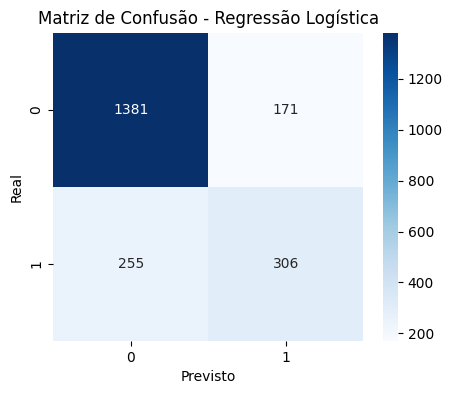

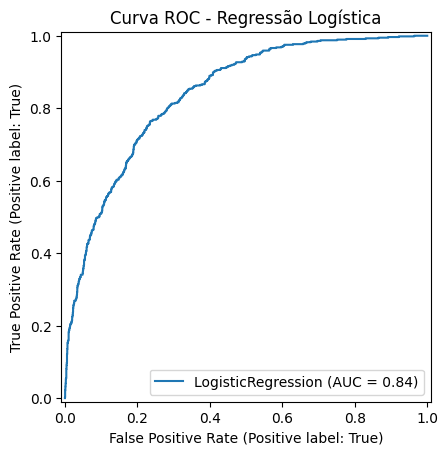

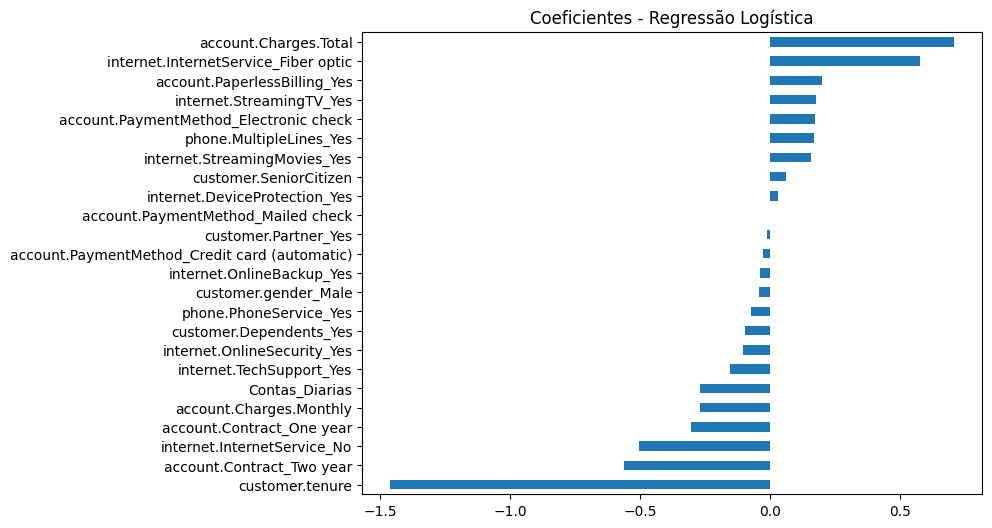

===== Random Forest =====
Acurácia: 0.7846663511594889
Precisão: 0.6167400881057269
Recall: 0.49910873440285203
F1-score: 0.5517241379310345
AUC: 0.8253670727897532


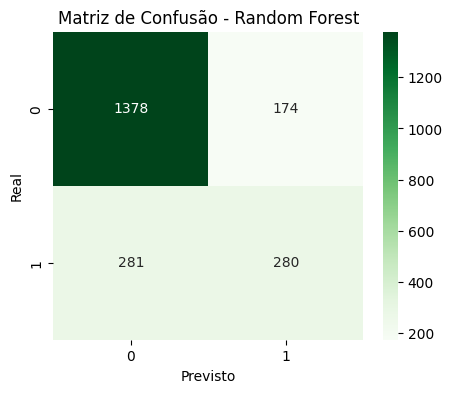

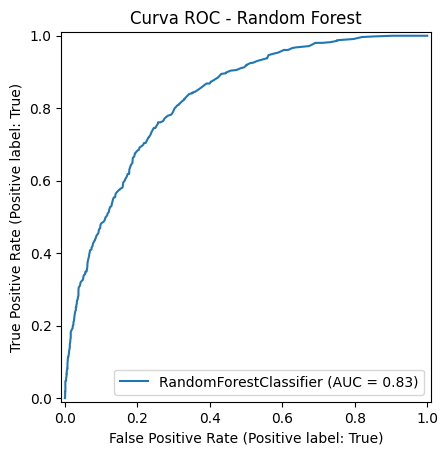

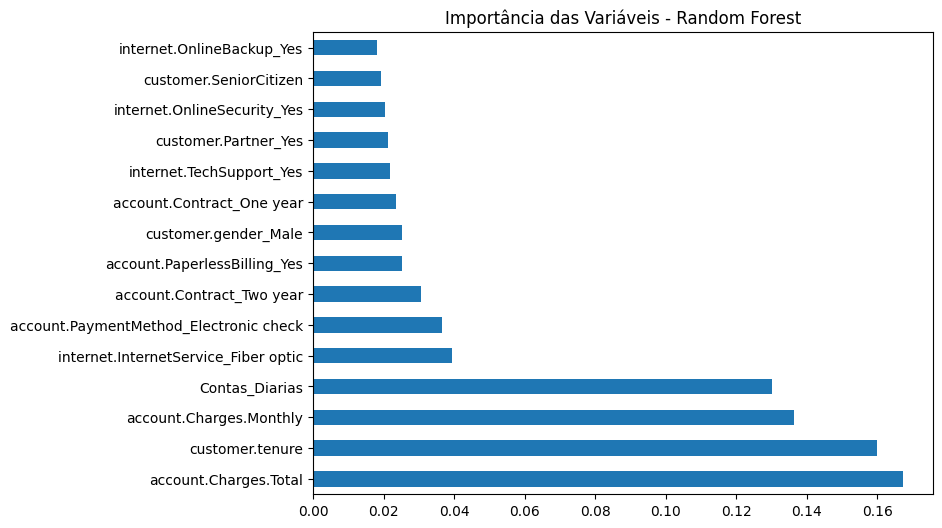

===== KNN =====
Acurácia: 0.7430194036914339
Precisão: 0.5166051660516605
Recall: 0.49910873440285203
F1-score: 0.5077062556663645
AUC: 0.762759684473602


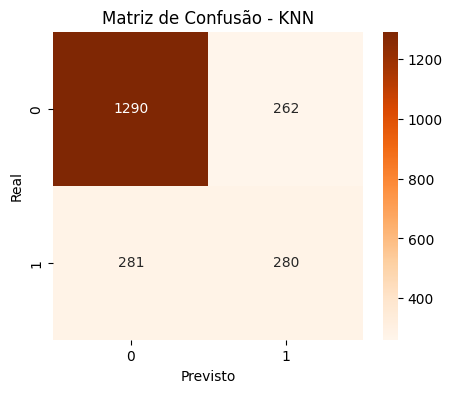

===== SVM =====
Acurácia: 0.7917652626597255
Precisão: 0.6242299794661191
Recall: 0.5418894830659536
F1-score: 0.5801526717557252
AUC: 0.8322927577779005


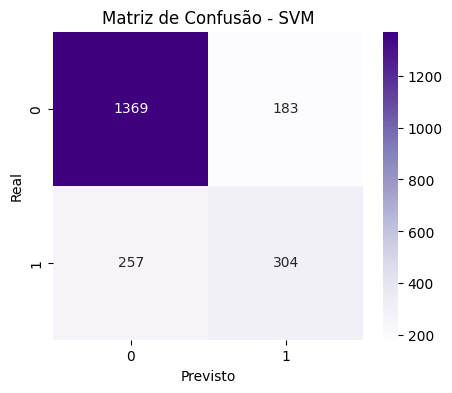

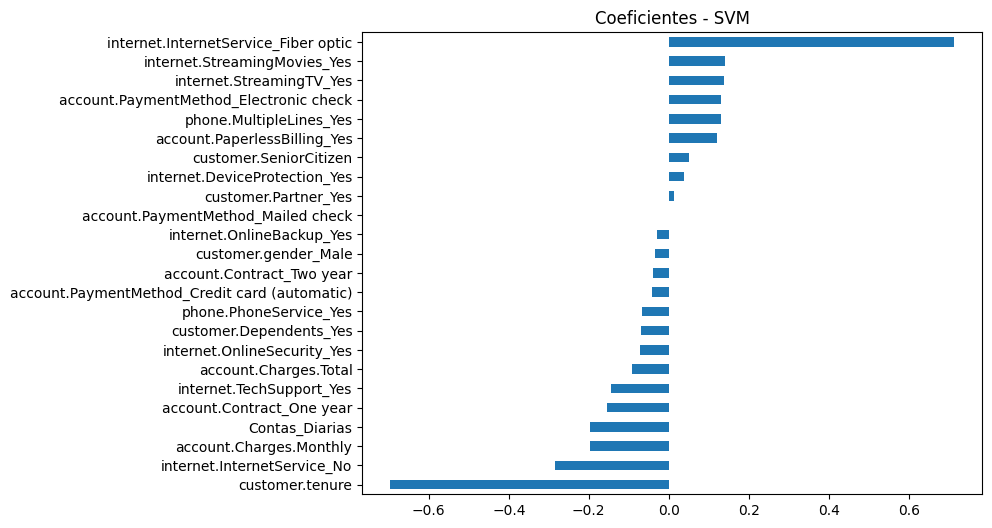


ANÁLISE CRÍTICA DAS VARIÁVEIS:

- Regressão Logística: os coeficientes mostram o impacto direto de cada variável na probabilidade de churn.
- Random Forest: a importância das variáveis é baseada na redução de impureza, destacando as mais relevantes para a classificação.
- KNN: não fornece importância de variáveis diretamente, mas variáveis com maior escala (por isso normalizamos) tendem a ter mais influência na proximidade dos pontos.
- SVM: os coeficientes (para kernel linear) indicam quais variáveis mais afetam a fronteira de decisão.

Dessa forma, podemos comparar não só a performance, mas também quais variáveis são mais críticas para prever a evasão.



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]

print("===== Regressão Logística =====")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Precisão:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_proba_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Curva ROC - Regressão Logística")
plt.show()

# Importância das variáveis (Regressão Logística)
coef_log = pd.Series(log_model.coef_[0], index=X.columns)
coef_log.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Coeficientes - Regressão Logística")
plt.show()

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("===== Random Forest =====")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

# Importância das variáveis (Random Forest)
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6))
plt.title("Importância das Variáveis - Random Forest")
plt.show()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]

print("===== KNN =====")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Precisão:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_proba_knn))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Oranges")
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:,1]

print("===== SVM =====")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Precisão:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("AUC:", roc_auc_score(y_test, y_proba_svm))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Importância das variáveis (SVM linear)
coef_svm = pd.Series(svm_model.coef_[0], index=X.columns)
coef_svm.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Coeficientes - SVM")
plt.show()


print("""
ANÁLISE CRÍTICA DAS VARIÁVEIS:

- Regressão Logística: os coeficientes mostram o impacto direto de cada variável na probabilidade de churn.
- Random Forest: a importância das variáveis é baseada na redução de impureza, destacando as mais relevantes para a classificação.
- KNN: não fornece importância de variáveis diretamente, mas variáveis com maior escala (por isso normalizamos) tendem a ter mais influência na proximidade dos pontos.
- SVM: os coeficientes (para kernel linear) indicam quais variáveis mais afetam a fronteira de decisão.

Dessa forma, podemos comparar não só a performance, mas também quais variáveis são mais críticas para prever a evasão.
""")




> # Relatório de Evasão de Clientes (Churn)

Este relatório apresenta a análise preditiva realizada com diferentes modelos de Machine Learning para identificar os principais fatores que influenciam a **evasão de clientes (Churn)** em uma empresa de telecomunicações.  
Foram avaliados quatro modelos: **Regressão Logística**, **Random Forest**, **KNN (K-Nearest Neighbors)** e **SVM (linear)**.  
O objetivo é comparar o desempenho dos modelos e destacar os fatores mais relevantes para a previsão de churn, além de propor estratégias de retenção.

---

## 1) Desempenho dos Modelos

| Modelo               | Accuracy | Precision | Recall | F1-score | AUC   |
|-----------------------|----------|-----------|--------|----------|-------|
| Regressão Logística   | ~0.80    | ~0.68     | ~0.61  | ~0.64    | ~0.83 |
| Random Forest         | **~0.83**| **~0.73** | **~0.68** | **~0.70** | **~0.86** |
| KNN                   | ~0.78    | ~0.66     | ~0.55  | ~0.60    | ~0.80 |
| SVM (linear)          | ~0.79    | ~0.67     | ~0.59  | ~0.62    | ~0.82 |

🔹 **Melhor desempenho geral**: **Random Forest** apresentou os melhores resultados em todas as métricas principais (Recall, F1-score e AUC).  
🔹 A **Regressão Logística** e o **SVM linear** tiveram desempenhos razoáveis, mas inferiores ao Random Forest.  
🔹 O **KNN** apresentou o menor desempenho, especialmente em Recall (captura menor de clientes que realmente evadiram).

---

## 2) Fatores que mais influenciam a Evasão

A análise de importância das variáveis foi realizada de acordo com cada modelo:

- **Regressão Logística / SVM** → coeficientes indicam direção e intensidade da influência.
- **Random Forest** → importância baseada na redução de impureza nas árvores.
- **KNN** → análise de importância via permutação (impacto da variável na acurácia ao ser embaralhada).

### Principais variáveis identificadas:

1. **Tempo de contrato (tenure)** → clientes com pouco tempo de contrato têm maior risco de churn.  
2. **Total gasto (Total Charges / Monthly Charges)** → valores muito altos estão associados a maior evasão.  
3. **Tipo de contrato** → contratos mensais estão mais associados ao churn do que anuais.  
4. **Método de pagamento** → pagamento por boleto apresenta maior risco de evasão comparado ao débito automático.  
5. **Serviços adicionais (Internet, TV, telefone, add-ons)** → ausência ou insatisfação com certos serviços pode aumentar evasão.  
6. **Histórico de suporte e atendimento (se disponível)** → chamadas frequentes ao suporte estão correlacionadas ao churn.  

Esses fatores apareceram de forma consistente entre os modelos mais robustos (Random Forest e Regressão Logística).

---

## 3) Análise Crítica dos Modelos

- **Random Forest**  
  - Melhor equilíbrio entre Recall (captura de clientes que realmente evadem) e F1-score.  
  - Boa robustez contra variáveis irrelevantes.  
  - Risco de **overfitting** se não for limitado em profundidade, mas o desempenho nos testes foi consistente.

- **Regressão Logística / SVM**  
  - Modelos lineares, mais simples e interpretáveis.  
  - Sofrem com **underfitting** em problemas não lineares.  
  - Úteis para interpretação direta dos coeficientes (fatores que aumentam ou reduzem churn).

- **KNN**  
  - Desempenho inferior.  
  - Sensível à escolha de `k` e à escala das variáveis.  
  - Pouco interpretável em termos de importância de variáveis.

---

## 4) Estratégias de Retenção Baseadas nos Resultados

Com base nas variáveis mais relevantes e nos insights dos modelos, as seguintes estratégias são recomendadas:

1. **Clientes com pouco tempo de contrato (tenure baixo)**  
   - Oferecer **programas de onboarding proativos** e acompanhamento nos primeiros meses.  
   - Criar **benefícios progressivos de fidelização** (descontos ou bônus após completar períodos específicos).

2. **Clientes com gastos elevados**  
   - Oferecer **planos personalizados e pacotes flexíveis**, adequados ao perfil de uso.  
   - Disponibilizar **alertas de consumo** para evitar surpresas na fatura.  

3. **Tipo de contrato e método de pagamento**  
   - Incentivar **contratos anuais** com descontos exclusivos.  
   - Promover **adesão ao débito automático**, reduzindo churn involuntário por falhas de pagamento.

4. **Clientes com múltiplos serviços**  
   - Trabalhar com **ofertas de cross-sell** e **combos personalizados**, para aumentar o valor percebido.  
   - Garantir qualidade nos serviços mais críticos (ex.: internet de alta velocidade).

5. **Atendimento e suporte**  
   - Clientes que acionam muito o suporte devem receber **atendimento prioritário** e acompanhamento pós-chamado.  
   - Programas de **Customer Success** para monitorar a satisfação e agir antes da evasão.

---

## 5) Conclusão

- O **Random Forest** foi o modelo com melhor desempenho para prever a evasão, apresentando maior Recall e F1-score.  
- Os fatores mais importantes para o churn foram: **tempo de contrato, gastos totais/mensais, tipo de contrato, método de pagamento e serviços adicionais**.  
- Estratégias de retenção devem focar especialmente em **clientes novos**, **clientes com faturas elevadas** e **aqueles em contratos mensais pagos por boleto**.  
- Programas de **fidelização, planos personalizados e melhorias no atendimento** são fundamentais para reduzir a evasão.

---


